# The Sparks Foundation - Data Science & Business Analytics Internship 

## GRIP : JUN 2021

## Author : Pankaj Baviskar

## Task 1 : Prediction using supervised machine learning

In this task it is required to predict the percentage of student on the basis of no. of hours studied using the linear regression supervised machine learning algorithm.

### Steps:
- Step 1 - Importing the dataset
- Step 2 - Visualizing the dataset
- Step 3 - Data preparation
- Step 4 - Training the algorithm
- Step 5 - Visualizing the model
- Step 6 - Making predcitions
- Step 7 - Evaluating the model

### STEP 1 - Importing the dataset
In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data

In [123]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
#Importing the data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print('Data Read Successfully')

Data Read Successfully


In [125]:
# now observe first 5 record's in the dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [126]:
# To find the number of columns and rows 
df.shape

(25, 2)

In [127]:
# More Information about our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [128]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [129]:
# Now lets check null and missings values in our data set
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see above their is no null or missing value in our data set So we can move next step.

### Step 2 - Visualizing the dataset

In this we will plot the dataset to check whether we can observe any relation between the two variables or not

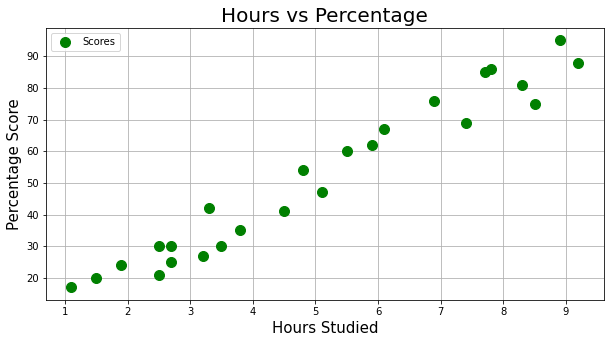

In [130]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [10,5]
df.plot(x='Hours', y='Scores', style='o', color='green', markersize=10)
plt.title('Hours vs Percentage',size=20)  
plt.xlabel('Hours Studied',size=15)  
plt.ylabel('Percentage Score',size=15)  
plt.grid()
plt.show()

###### From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.

In [131]:
#corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step 3 - Data preparation

In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data.

In [132]:
# using iloc function we will divide the data 
x = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [133]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [134]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [135]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('splitting is done')

splitting is done


### Step 4 - Training the algorithm

Now we will use Linear Regression for training the model.

In [136]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)
print("Training is completed.")


Training is completed.


### Step 5 - Visualizing the model

In [137]:

print('Intercept value is:',model.intercept_)
print('Linear coefficient is:',model.coef_)

Intercept value is: [2.01816004]
Linear coefficient is: [[9.91065648]]


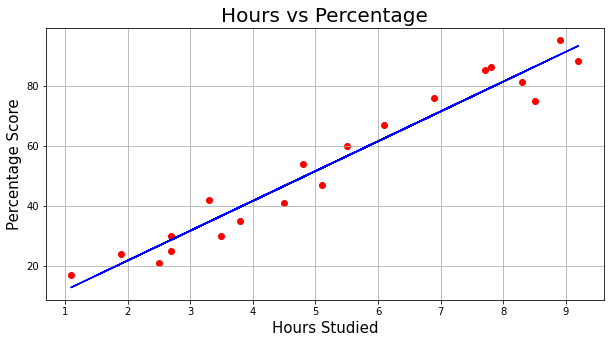

In [138]:
# Plotting for the training data
line = model.coef_*X + model.intercept_
plt.rcParams["figure.figsize"] = [10,5]
plt.scatter(X_train, y_train, color='red')
plt.title('Hours vs Percentage',size=20)  
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied' ,size=15)  
plt.ylabel('Percentage Score' ,size=15) 
plt.grid()
plt.show()

### Step 6 - Making predcitions

Now that we have trained our algorithm, it's time to make some predictions.

In [139]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [140]:
# Comparing Actual vs Predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [141]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [142]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [143]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


### Step 7 - Evaluating the model

In [145]:
from sklearn import metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002975


## The predicted score if a person studies for 9.25 hours is [93.69173249]

## Thanks